# Embedding Potential for Cs<sub>2</sub>UO<sub>2</sub>Cl<sub>4</sub>:

This notebook is meant to give an overview over the progress for developing the most physical meaningfull embedding potential of uranyl cation in Cs<sub>2</sub>UO<sub>2</sub>Cl<sub>4</sub>. This notebook is still in development and newer results will be added to this notebook frequently.

## Table of Contents:

1 [Performed Calculations](#Performed Calculations)

2 [Results](#results)

<div id='Performed Calculations'/>
## Performed Calculations 

The following calculations were performed using the PBE XC-functional an USPP from the PS library (version: 1.0.0) created with Quantum Espresso (QE version: 6.1).

For the subsystem calculations embedded Quantum Espresso were used in the newest version from the gitlab repository (https://gitlab.com/Pavanello/eqe).

The crystal data is based on the study of Watkin et al. (_Acta Cryst. A_ __1991__, C47, 2517-2519).

The calculations were performed using 14 subsystems

* 2 x UO<sup>2+</sup>
* 8 x Cl<sup>-</sup>
* 4 x Cs<sup>+</sup>

and the following pseudopotentials were used:

* U:  U.pbe-spfn-rrkjus_psl.1.0.0.UPF
* O:  O.pbe-n-rrkjus_psl.1.0.0.UPF
* Cl: Cl.pbe-n-rrkjus_psl.1.0.0.UPF
* Cs: Cs.pbe-spn-rrkjus_psl.1.0.0.UPF

<div id='results'/>
## Results 


The following plot is showing k-point variation and Energy cut off vatiation against the calculated zero point energy:


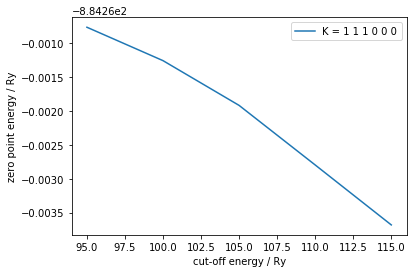

In [3]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

energy_cutoff1 = np.array([95, 100, 105, 110, 115])
energy1 = np.array([-884.26076091, -884.26125473, -884.26191638, -884.26279715, -884.26368351])

energy_cutoff2 = np.array([100, 105, 110, 115])
energy2 = np.array([])

energy_cutoff3 = np.array([100, 105, 110, 115])
energy3 = np.array([])

plt.plot(energy_cutoff1, energy1, label = 'K = 1 1 1 0 0 0')
plt.xlabel('cut-off energy / Ry')
plt.ylabel('zero point energy / Ry')
plt.legend()
plt.show()

The following results are based on a cut off energy of 105 Ry. 

* Orbitals:

* Embedding Potential:

In the first figure it is shown a 2D cut plane orthogonal to the O-U-O bond axis:


<img align="left" src="embed_cut.png" width = "500"> <img align="left" src="embed_cut_thermometer.png" width = "150">


<img align="left" src="embed_cut2.png" width = "500"> <img align="left" src="embed_cut_thermometer2.png" width = "150">

The same can be done with 1D plots in one particular direction. The first plot is shown the embedding potential in the direction of the U-O bond.

In [76]:
from pbcpy.grid import Plot
from pbcpy.formats.qepp import PP
from pbcpy.formats.xsf import XSF
from pbcpy.base import Coord
from pbcpy.base import Cell
import numpy as np
from pbcpy.base import pbcarray
from matplotlib.ticker import OldScalarFormatter, ScalarFormatter
import  matplotlib.pyplot as plt

In [77]:
GGA = PP('embeddingpot_GGA.pp').read()
GGAU = PP('embeddingpot_GGA_U.pp').read()

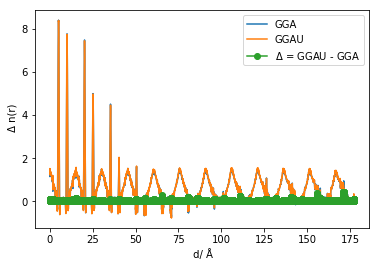

In [116]:
distance_scalar = 100

x0 = GGA.ions[2].pos
r0 = distance_scalar*GGA.ions[2].pos.d_mic(GGA.ions[1].pos)

gridpoints = 40000
d = (r0).length()*0.52918

scalar = d/gridpoints

plot_cut1D_GGA = GGA.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGAU = GGAU.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)

xvalues = np.arange(0,gridpoints,1)

plt.plot(xvalues*scalar,plot_cut1D_GGA.values, label = 'GGA' )
plt.plot(xvalues*scalar,plot_cut1D_GGAU.values, label = 'GGAU' )
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGAU.values-plot_cut1D_GGA.values), label = '$\Delta$ = GGAU - GGA', marker = 'o')

plt.xlabel(' d/ Å')
plt.ylabel(' Δ n(r)')
plt.legend()

plt.show()

The second plot will show the the potential in a 45° to the U-O bond. This will direktly go throught the unranium atom in one of the corners of the crystal unit cell.

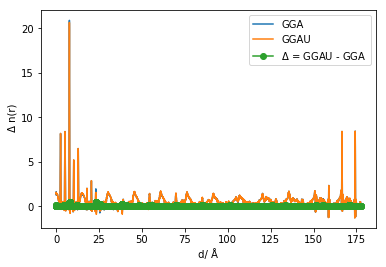

In [117]:
x0 = GGA.ions[2].pos
r0 = distance_scalar*Coord(pos=[2.16776215, 5, 2.55639449],cell=GGA.cell)
plot_cut1D_GGA = GGA.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)
plot_cut1D_GGAU = GGAU.plot.get_plotcut(x0=x0, r0=r0, nr=gridpoints)


plt.plot(xvalues*scalar, plot_cut1D_GGA.values, label = 'GGA')
plt.plot(xvalues*scalar, plot_cut1D_GGAU.values, label = 'GGAU')
plt.plot(xvalues*scalar,np.abs(plot_cut1D_GGAU.values-plot_cut1D_GGA.values), label = '$\Delta$ = GGAU - GGA', marker = 'o')

plt.xlabel(' d/ Å ')
plt.ylabel(' Δ n(r)')
plt.legend()
plt.show()